# Preliminary EDA for AMES Iowa Housing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data Dictionary For Housing Data

In [3]:
def get_unique_values(df):
    for i in df.columns:
        print(i,set(np.unique(df[i])),'\n')
        
def type_(x):
    if len(x) == 0:
        t = 'Numerical'
    elif len(x) == 2:
        t = 'Binary Categorical'
    else:
        t = 'Categorical' 
    return t

In [4]:
housing_dict = pd.read_csv('./data/data_description.txt',
                   sep="\n|:",
                   header=None,
                   engine='python')

housing_dict.columns = ['var','descr']

new_housing_dict = housing_dict.loc[~housing_dict['descr'].isnull()]

new_housing_dict.loc[0:,'index_'] = new_housing_dict.index

idx = new_housing_dict['index_'].to_numpy()
i = 0
indx_outcomes = []
while (i < len(idx)-1):
    indx_outcomes.append(np.arange(idx[i]+1,idx[i+1]))
    i += 1

associated_outcomes = []
for j in indx_outcomes:
    associated_outcomes.append(housing_dict[['var']].loc[j].to_numpy())
    
associated_outcomes.append(np.array([])) #append an empty array to fix length issue

associated_outcomes = pd.Series(associated_outcomes).\
                        apply(lambda outcome_set: [i[0] for i in outcome_set]).to_numpy()



new_housing_dict.loc[0:,'associated_outcomes'] = associated_outcomes
new_housing_dict = new_housing_dict.reset_index()
new_housing_dict = new_housing_dict.drop(['index','index_'], axis = 1)


types = [type_(elem) for elem in new_housing_dict['associated_outcomes']]
new_housing_dict.loc[0:,'Variable Type'] = types

housing_dict = new_housing_dict

def ghd():
    return(housing_dict.sort_values(by = "var"))

# Reading in Housing Data

In [5]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv')
housing.rename(columns = {'PID':'MapRefNo'}, inplace = True) # renaming to later merge res and housing on this column
housing = housing.drop('Unnamed: 0', axis = 1)
housing.shape

(2580, 81)

In [6]:
housing.head()

MapRefNo  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
0  909176150        856     126000          30       RL          NaN     7890   
1  905476230       1049     139500         120       RL         42.0     4235   
2  911128020       1001     124900          30  C (all)         60.0     6060   
3  535377150       1039     114000          70       RL         80.0     8146   
4  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
1   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
4   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        SWISU       Norm       Norm     1Fam     1Story            6   
1      Edwards       Norm       Norm   TwnhsE     1Story            5   
2       IDOTRR       Norm       Norm     1Fam     1Story            5   
3      OldTown       Norm       Norm     1Fam     2Story            4   
4       NWAmes       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            6       1939          1950     Gable  CompShg     Wd Sdng   
1            5       1984          1984     Gable  CompShg     HdBoard   
2            9       1930          2007       Hip  CompShg     MetalSd   
3            8       1900          2003     Gable  CompShg     MetalSd   
4            6       2001          2001     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Wd Sdng       None         0.0        TA        TA     CBlock       TA   
1     HdBoard    BrkFace       149.0        Gd        TA     CBlock       Gd   
2     MetalSd       None         0.0        Gd        TA     BrkTil       TA   
3     MetalSd       None         0.0        Gd        Gd     BrkTil       Fa   
4     VinylSd       None         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          Rec       238.0          Unf         0.0   
1       TA           Mn          GLQ       552.0          ALQ       393.0   
2       TA           No          ALQ       737.0          Unf         0.0   
3       TA           No          Unf         0.0          Unf         0.0   
4       TA           No          GLQ       643.0          Unf         0.0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0      618.0        856.0    GasA        TA          Y      SBrkr       856   
1      104.0       1049.0    GasA        TA          Y      SBrkr      1049   
2      100.0        837.0    GasA        Ex          Y      SBrkr      1001   
3      405.0        405.0    GasA        Gd          Y      SBrkr       717   
4      167.0        810.0    GasA        Ex          Y      SBrkr       810   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0         0             0           1.0           0.0         1         0   
1         0             0           1.0           0.0         2         0   
2         0             0           0.0           0.0         1         0   
3       322             0           0.0           0.0         1         0   
4       855             0           1.0           0.0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             4        Typ   
1             2             1          Gd             5        Typ   
2             2             1          Gd             5        Typ   
3             2             1          TA             6 

# Looking Into Square Footage Variables:

We consider 2 groups:

 - Within House:

1stFlrSF,2ndFlrSF,BsmntFinSF1,BsmntFinSF2,BsmtUnfSF,GrLivArea,LowQualFinSF,TotalBsmtSF

 - Auxillary:
 
3SsnPorch,EnclosedPorch,GarageArea,LotArea,MasVnrArea,OpenPorchSF,PoolArea,ScreenPorch,WoodDeckSF


**Some Within House Square Footage Feature Engineering:**

In [7]:
whsf_cols = ['SalePrice','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GrLivArea','LowQualFinSF','TotalBsmtSF']
whsf = ghd().set_index('var').loc[whsf_cols,:] #within house sf

################################################################################# Total Square Footage Including Basement Within House

housing.loc[0:,'TotalSF'] = housing['GrLivArea'] + housing['TotalBsmtSF']
whsf_cols.append('TotalSF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Price per Square Foot Within House

housing.loc[0:,'Price/SF'] = housing['SalePrice']/housing['TotalSF']
whsf_cols.append('Price/SF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of Basement Unfinished


housing.loc[0:,'BsmtPercentUnfinished'] = housing['BsmtUnfSF']/housing['TotalBsmtSF']
whsf_cols.append('BsmtPercentUnfinished')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of total within house sf that's finished & low quality


housing.loc[0:,'LowQualFinishedPercent'] = housing['LowQualFinSF']/(housing['TotalSF'])
whsf_cols.append('LowQualFinishedPercent')
whsf = ghd().set_index('var').loc[whsf_cols,:]

In [8]:
housing[whsf.index].head()

SalePrice  1stFlrSF  2ndFlrSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     126000       856         0       238.0         0.0      618.0   
1     139500      1049         0       552.0       393.0      104.0   
2     124900      1001         0       737.0         0.0      100.0   
3     114000       717       322         0.0         0.0      405.0   
4     227000       810       855       643.0         0.0      167.0   

   GrLivArea  LowQualFinSF  TotalBsmtSF  TotalSF   Price/SF  \
0        856             0        856.0   1712.0  73.598131   
1       1049             0       1049.0   2098.0  66.491897   
2       1001             0        837.0   1838.0  67.954298   
3       1039             0        405.0   1444.0  78.947368   
4       1665             0        810.0   2475.0  91.717172   

   BsmtPercentUnfinished  LowQualFinishedPercent  
0               0.721963                     0.0  
1               0.099142                     0.0  
2               0.119474                     0.0  
3               1.000000                     0.0  
4               0.206173                     0.0

**Some Auxillary Square Footage Feature Engineering:**

In [9]:
auxsf_cols = ['SalePrice','3SsnPorch','EnclosedPorch','GarageArea','LotArea','OpenPorchSF','PoolArea','ScreenPorch','WoodDeckSF']
auxsf = ghd().set_index('var').loc[auxsf_cols,:] #auxillary house sf
#auxsf

################################################################################# Auxillary Total Square Footage

housing.loc[0:,'TotalAuxSF'] = [np.sum(housing[auxsf.index[1:-1]].iloc[i,:]) for i in range(0,len(housing))]
auxsf_cols.append('TotalAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# difference from mean total aux sf

housing.loc[0:,'relativeAuxSF'] =  housing['TotalAuxSF'] - np.mean(housing['TotalAuxSF'])
auxsf_cols.append('relativeAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# Price per auxillary SF
housing.loc[0:,'Price/AuxSF'] =  housing['SalePrice']/housing['TotalAuxSF']
auxsf_cols.append('Price/AuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

In [10]:
housing[auxsf.index].head()

SalePrice  3SsnPorch  EnclosedPorch  GarageArea  LotArea  OpenPorchSF  \
0     126000          0              0       399.0     7890            0   
1     139500          0              0       266.0     4235          105   
2     124900         86             42       216.0     6060            0   
3     114000          0            168       281.0     8146            0   
4     227000          0              0       528.0     8400           45   

   PoolArea  ScreenPorch  WoodDeckSF  TotalAuxSF  relativeAuxSF  Price/AuxSF  
0         0          166           0      8455.0   -2221.488372    14.902425  
1         0            0           0      4606.0   -6070.488372    30.286583  
2         0            0         154      6404.0   -4272.488372    19.503435  
3         0          111           0      8706.0   -1970.488372    13.094418  
4         0            0           0      8973.0   -1703.488372    25.298117

### Data Dictionary for Real Estate Data

In [11]:
res = pd.read_csv('./data/Ames_Real_Estate_Data.csv')
res.shape

dd_res = pd.read_excel('./data/Tbl_DataExportSpec.xls')
dd_res.shape

(100, 7)

## **Note: res columns (36,40,81,87) have mixed data types**

In [12]:
#res.iloc[:,[36,40,81,87]]

### Data Dictionary for Housing Data

# Merging housing and real estate datasets

In [13]:
#dd_res.sort_values(by ='Field Name').head()

In [14]:
Kres = ['MapRefNo','SchD_S','TxD_S','Rcrd_Yr','Rcrd_Mo','LndAc_S','ImpAc_S', #res variables to potentially keep
        'OthAc_S','TtlVal_AsrYr','ValType','TxNet','TxGross',
        'AcreGr','AcreNt_S','LotArea','YrBuilt','HouseStyle',
        'Foundation','RoofMatl','Ext1','Ext2','MasVnrType',
       'Heating','Central Air','GLA','TtlBsmtSF',
       'TotRmsAbvGrd','Fireplaces','PoolArea','GarageType',
       'GarYrBlt','Cars','SalePrice','SaleType',
       'SaleCond','PA-Nmbr','PA-PreD','PA-Strt','PA-StSfx',
       'PA-PostD','PA-UnTyp','PA-UntNo','Date','Source','NmbrBRs']

idx = [list(res.columns).index(i) for i in Kres if i in res.columns]

res_truncated = res.iloc[:,idx]

hres = pd.merge(housing,res_truncated,how = 'inner', on = 'MapRefNo')

#### Some variable names are duplicated in the real estate dataset:

y = hres.columns.str.contains(pat = '._y')
dup_idy = [i  for i,j in enumerate(y) if j == True]
d = hres[hres.columns[[tuple(dup_idy)]]].columns.to_numpy()

for i in range(0,len(d)):
    d[i] = d[i].strip('_y')
    
Kres = list(set(Kres) - set(d))
idx = [list(res.columns).index(i) for i in Kres if i in res.columns]
res_truncated = res.iloc[:,idx]
hres = pd.merge(housing,res_truncated,how = 'inner', on = 'MapRefNo')

**Real estate data is from recent years (2017-2020),
Housing data is from 2006-2010**

# Investigating Merged Dataset

In [15]:
hres.columns

Index(['MapRefNo', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       ...
       'Date', 'Source', 'PA-PreD', 'Ext2', 'PA-UnTyp', 'SchD_S', 'GLA',
       'SaleCond', 'PA-StSfx', 'PA-UntNo'],
      dtype='object', length=118)

In [16]:
#dd_res.sort_values(by = 'Field Name')

In [17]:
#hres[['MapRefNo','Date','LndAc_S','YrBuilt']]

### Functions to filter correlation heatmaps:

In [18]:
import copy

def corr_filter(df,thresh,less_or_eq):
    
    if (less_or_eq == True):
        j = copy.deepcopy(df)
        for i in df.columns.to_numpy():
            j[i] = np.where(np.abs(j[i]) <= thresh,'',j[i])
        
        return j
    
    elif(less_or_eq == False):
        j = copy.deepcopy(df)
        for i in df.columns.to_numpy():
            j[i] = np.where(np.abs(j[i]) > thresh,'',j[i])
        
        return j

def filtered_Heat(df,t,h,w,a,dir_):
    
    if dir_ == True:
        
        sign = '>'
        
    else:
        
        sign = '<='
        
    M = corr_filter(df,thresh = t,less_or_eq = dir_)
    fig = px.imshow(M,width = w, height = w,aspect = a,
                color_continuous_scale = 'blues',
                title = f'Filtered Heatmap: |Corr| {sign} {t}')
    fig.show()

In [501]:
hcorr = pd.DataFrame(housing.corr())
hrescorr = pd.DataFrame(hres.corr())
hrescorr_nonull = hrescorr.dropna(axis = 0,how = 'all').dropna(axis = 1,how = 'all')

filtered_Heat(hrescorr_nonull,0,h=800,w=800,a=1,dir_ = True) #merged dataset heatmap

fig = px.imshow(hcorr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Sale Price Heatmap Housing Dataset')
fig.show()

fig = px.imshow(hrescorr_nonull[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Sale Price Heatmap Merged Dataset')
fig.show()

fig = px.imshow(hrescorr_nonull[['Price/SF']].sort_values(by = 'Price/SF', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Price/SF Heatmap Merged Dataset')
fig.show()

### Correlation Lists

In [24]:
hsale_cors =  hcorr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False) # sorted correlations with SalePrice from Housing dataset
sale_cors = hrescorr_nonull[['SalePrice']].sort_values(by = 'SalePrice', ascending = False) # sorted correlations with SalePrice from merged dataset
price_rate_cors = hrescorr_nonull[['Price/SF']].sort_values(by = 'Price/SF', ascending = False) # sorted correlations with Price/SF from merged dataset

# Trends against Sale Price (Hued by Overall Quality)

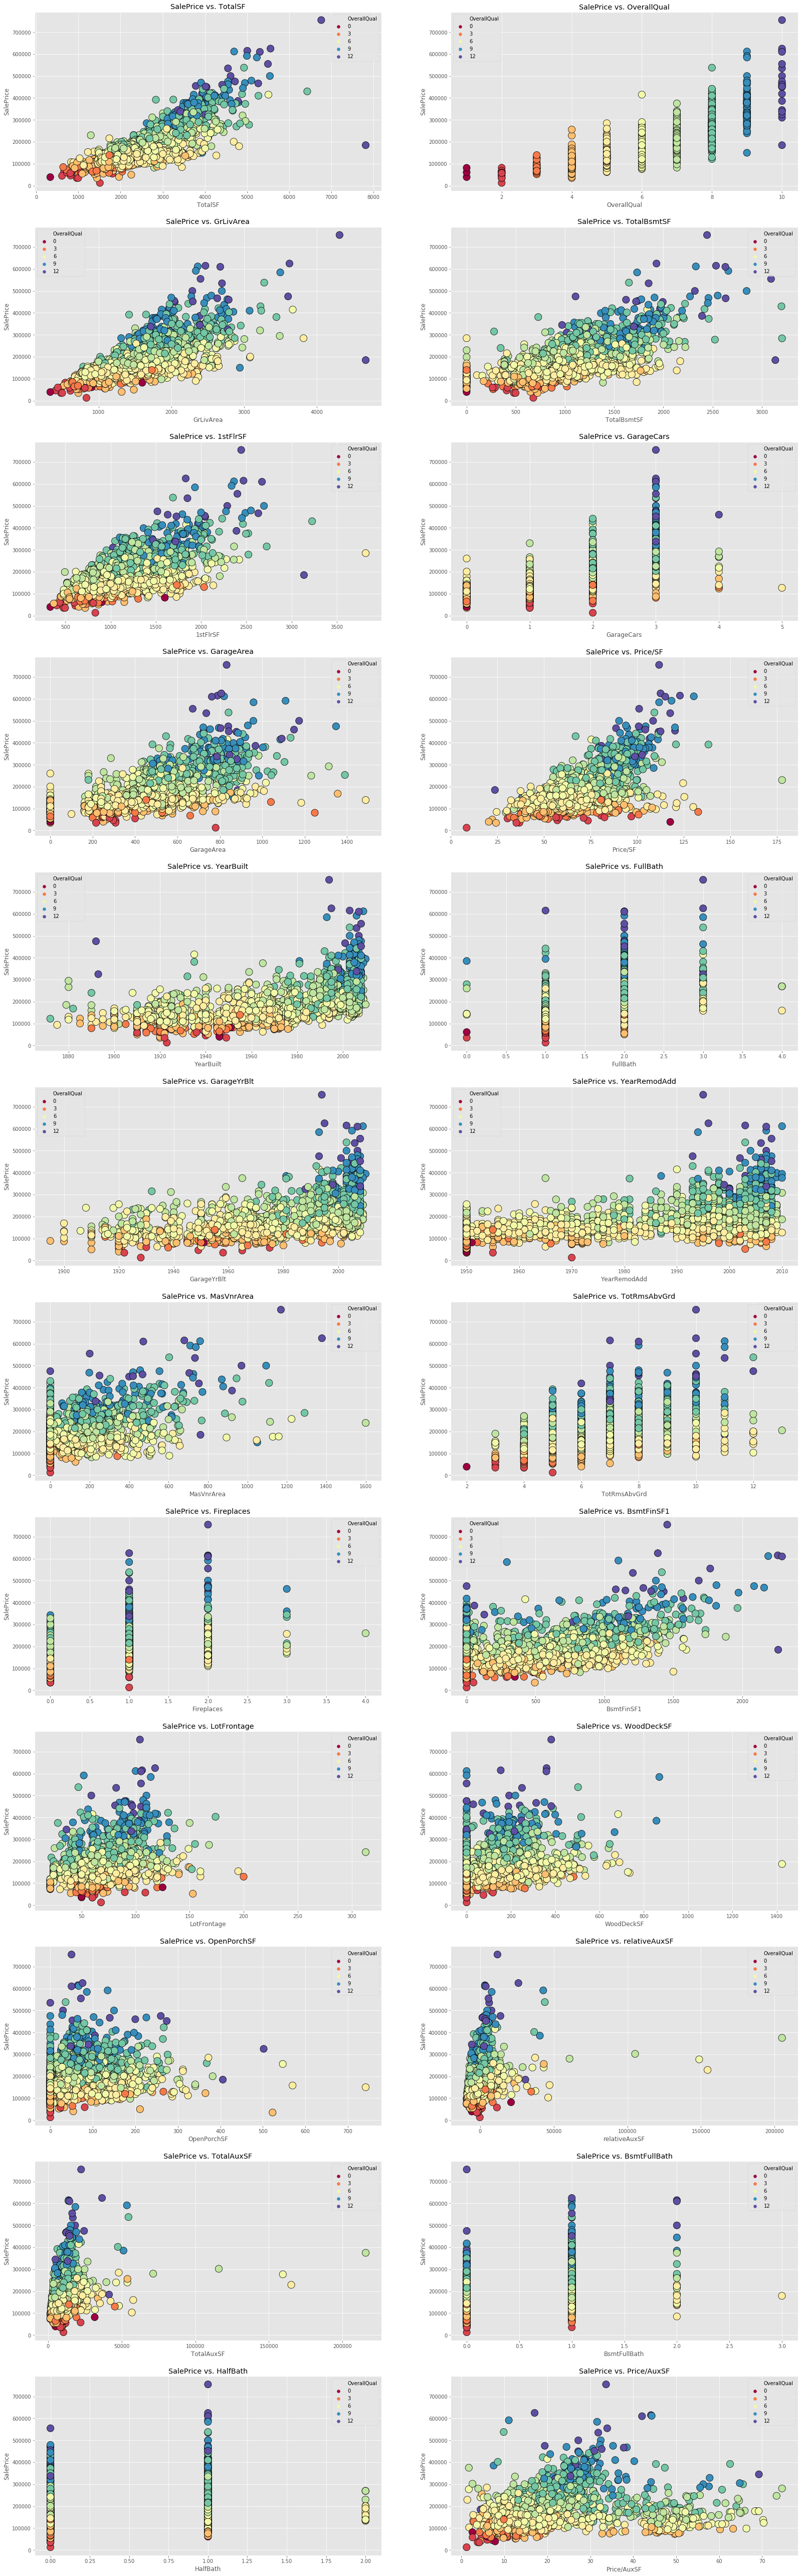

In [36]:
fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(hsale_cors.index[1:25])):
    sns.scatterplot(y='SalePrice', x=col, s = 200,ax=axs[i],hue = 'OverallQual',palette="Spectral",edgecolor = 'black',data=housing)
    axs[i].set_ylabel('SalePrice')
    axs[i].set_xlabel(col)
    axs[i].set_title(f'SalePrice vs. {col}')
plt.show()

## *The following have bunches at 0, likely because they are conditional on existing in the first place:*

#### TotalBsmntSF -> Conditional on having a basement

#### GarageArea -> Conditional on having a garage

#### YearRemodAdd -> Conditional on having a remodeling instance

#### MasVnrArea -> Conditional having Masonry Veneer

#### BsmntFinSF1 -> Conditional on having a basement

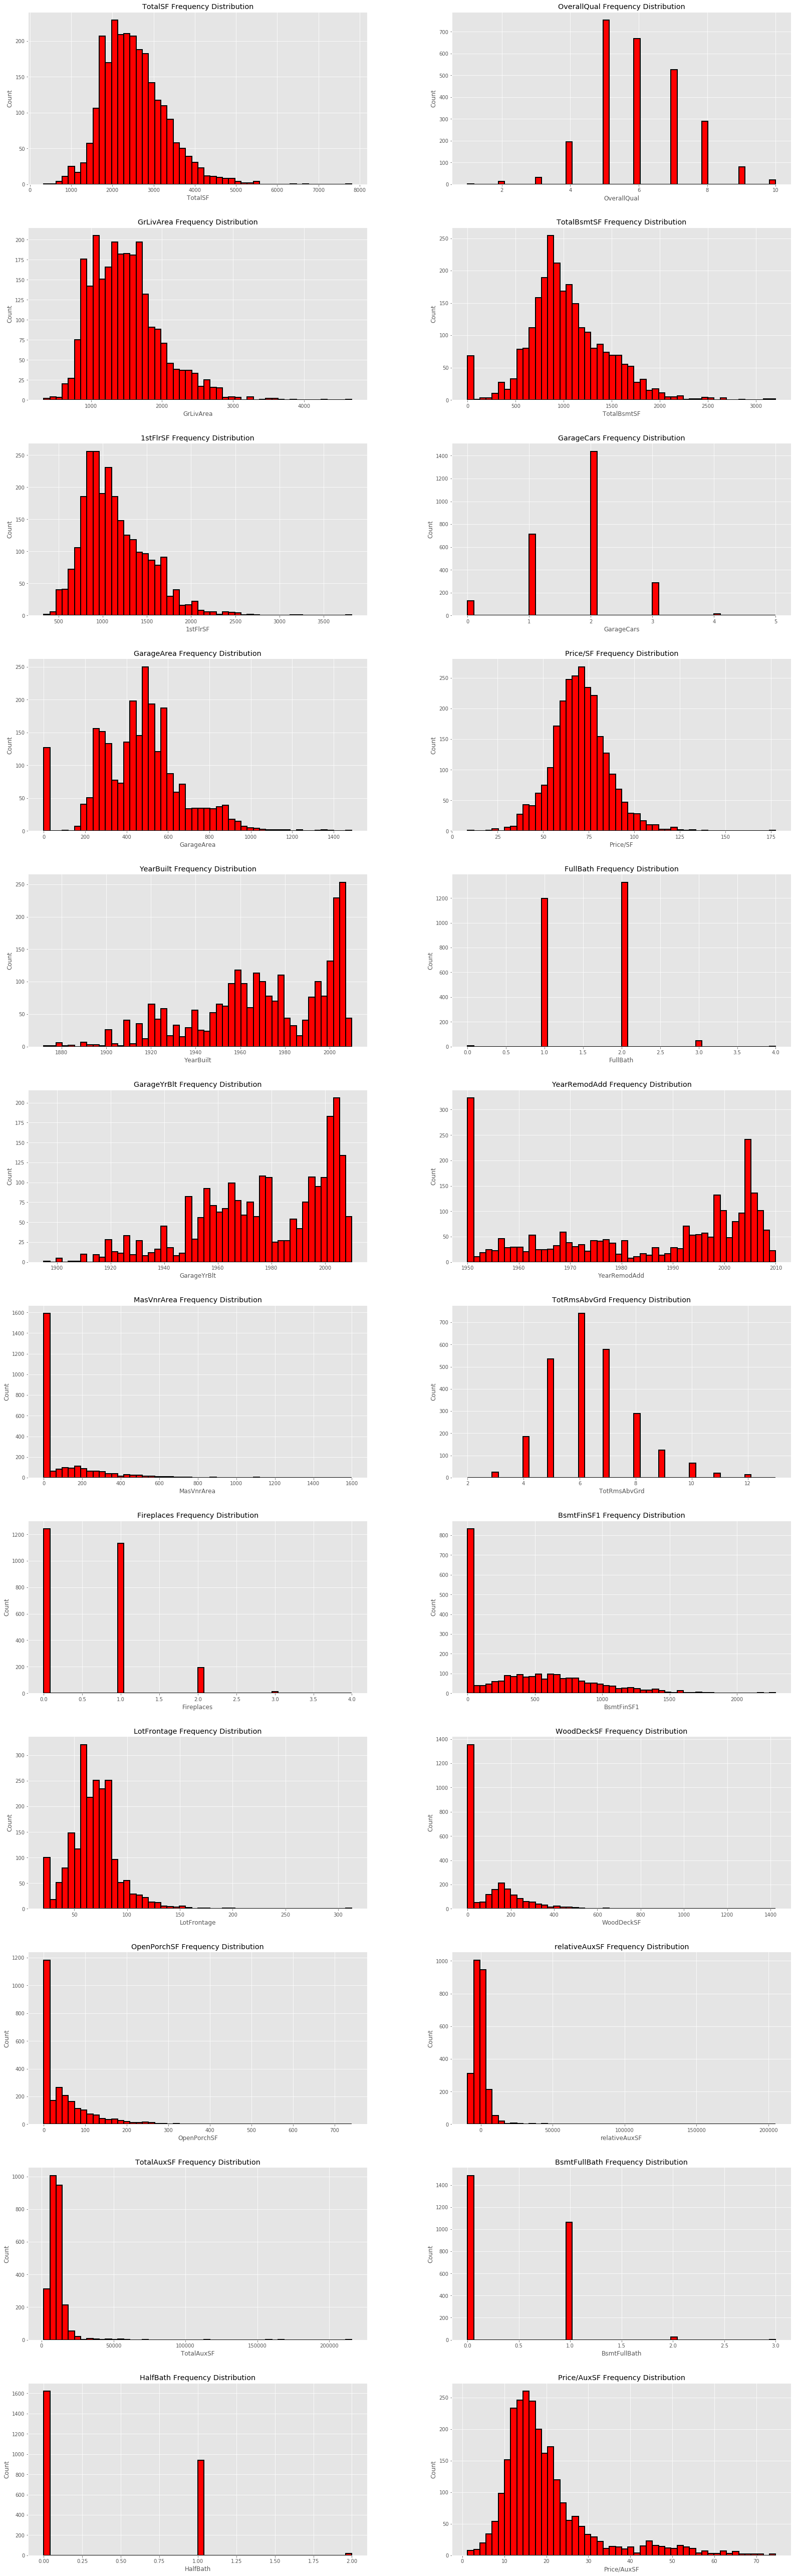

In [26]:
fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3,wspace = .25,hspace = .25)
axs = axs.flatten()
for i, col in enumerate(list(hsale_cors.index[1:25])):
    axs[i].hist(x=col,data=housing,edgecolor = 'black',color = 'red',linewidth = 2, bins = 50)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(col)
    axs[i].set_title(f'{col} Frequency Distribution')

## Trends against Overall Quality (Hued by Sale Price)

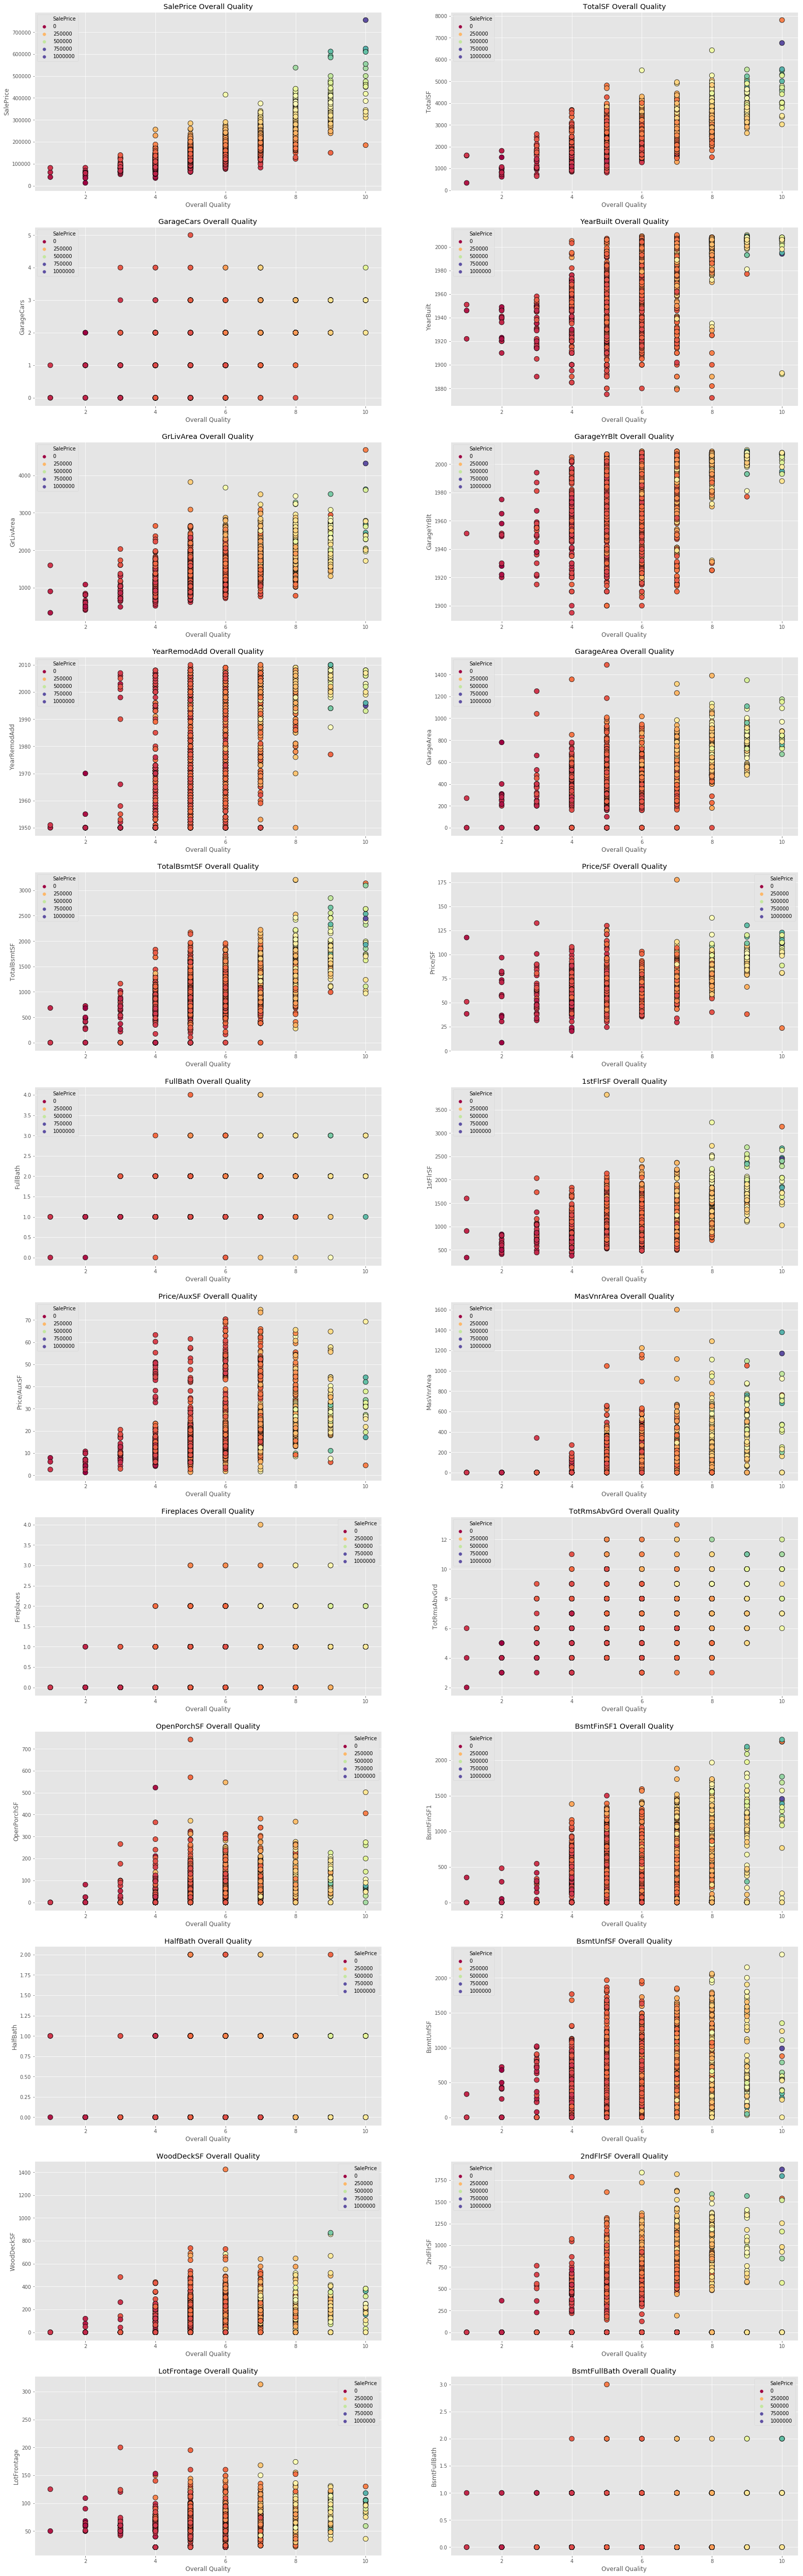

In [27]:
qual_cors = hcorr[['OverallQual']].sort_values(by = 'OverallQual', ascending = False)

fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(qual_cors.index[1:25])):
    sns.scatterplot(y=col, x='OverallQual',s=100 ,ax=axs[i],
                    hue = 'SalePrice',palette="Spectral",
                    edgecolor = 'black',data=housing)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Overall Quality')
    axs[i].set_title(f'{col} Overall Quality')
plt.show()

# Boxplot vs. Overall Quality

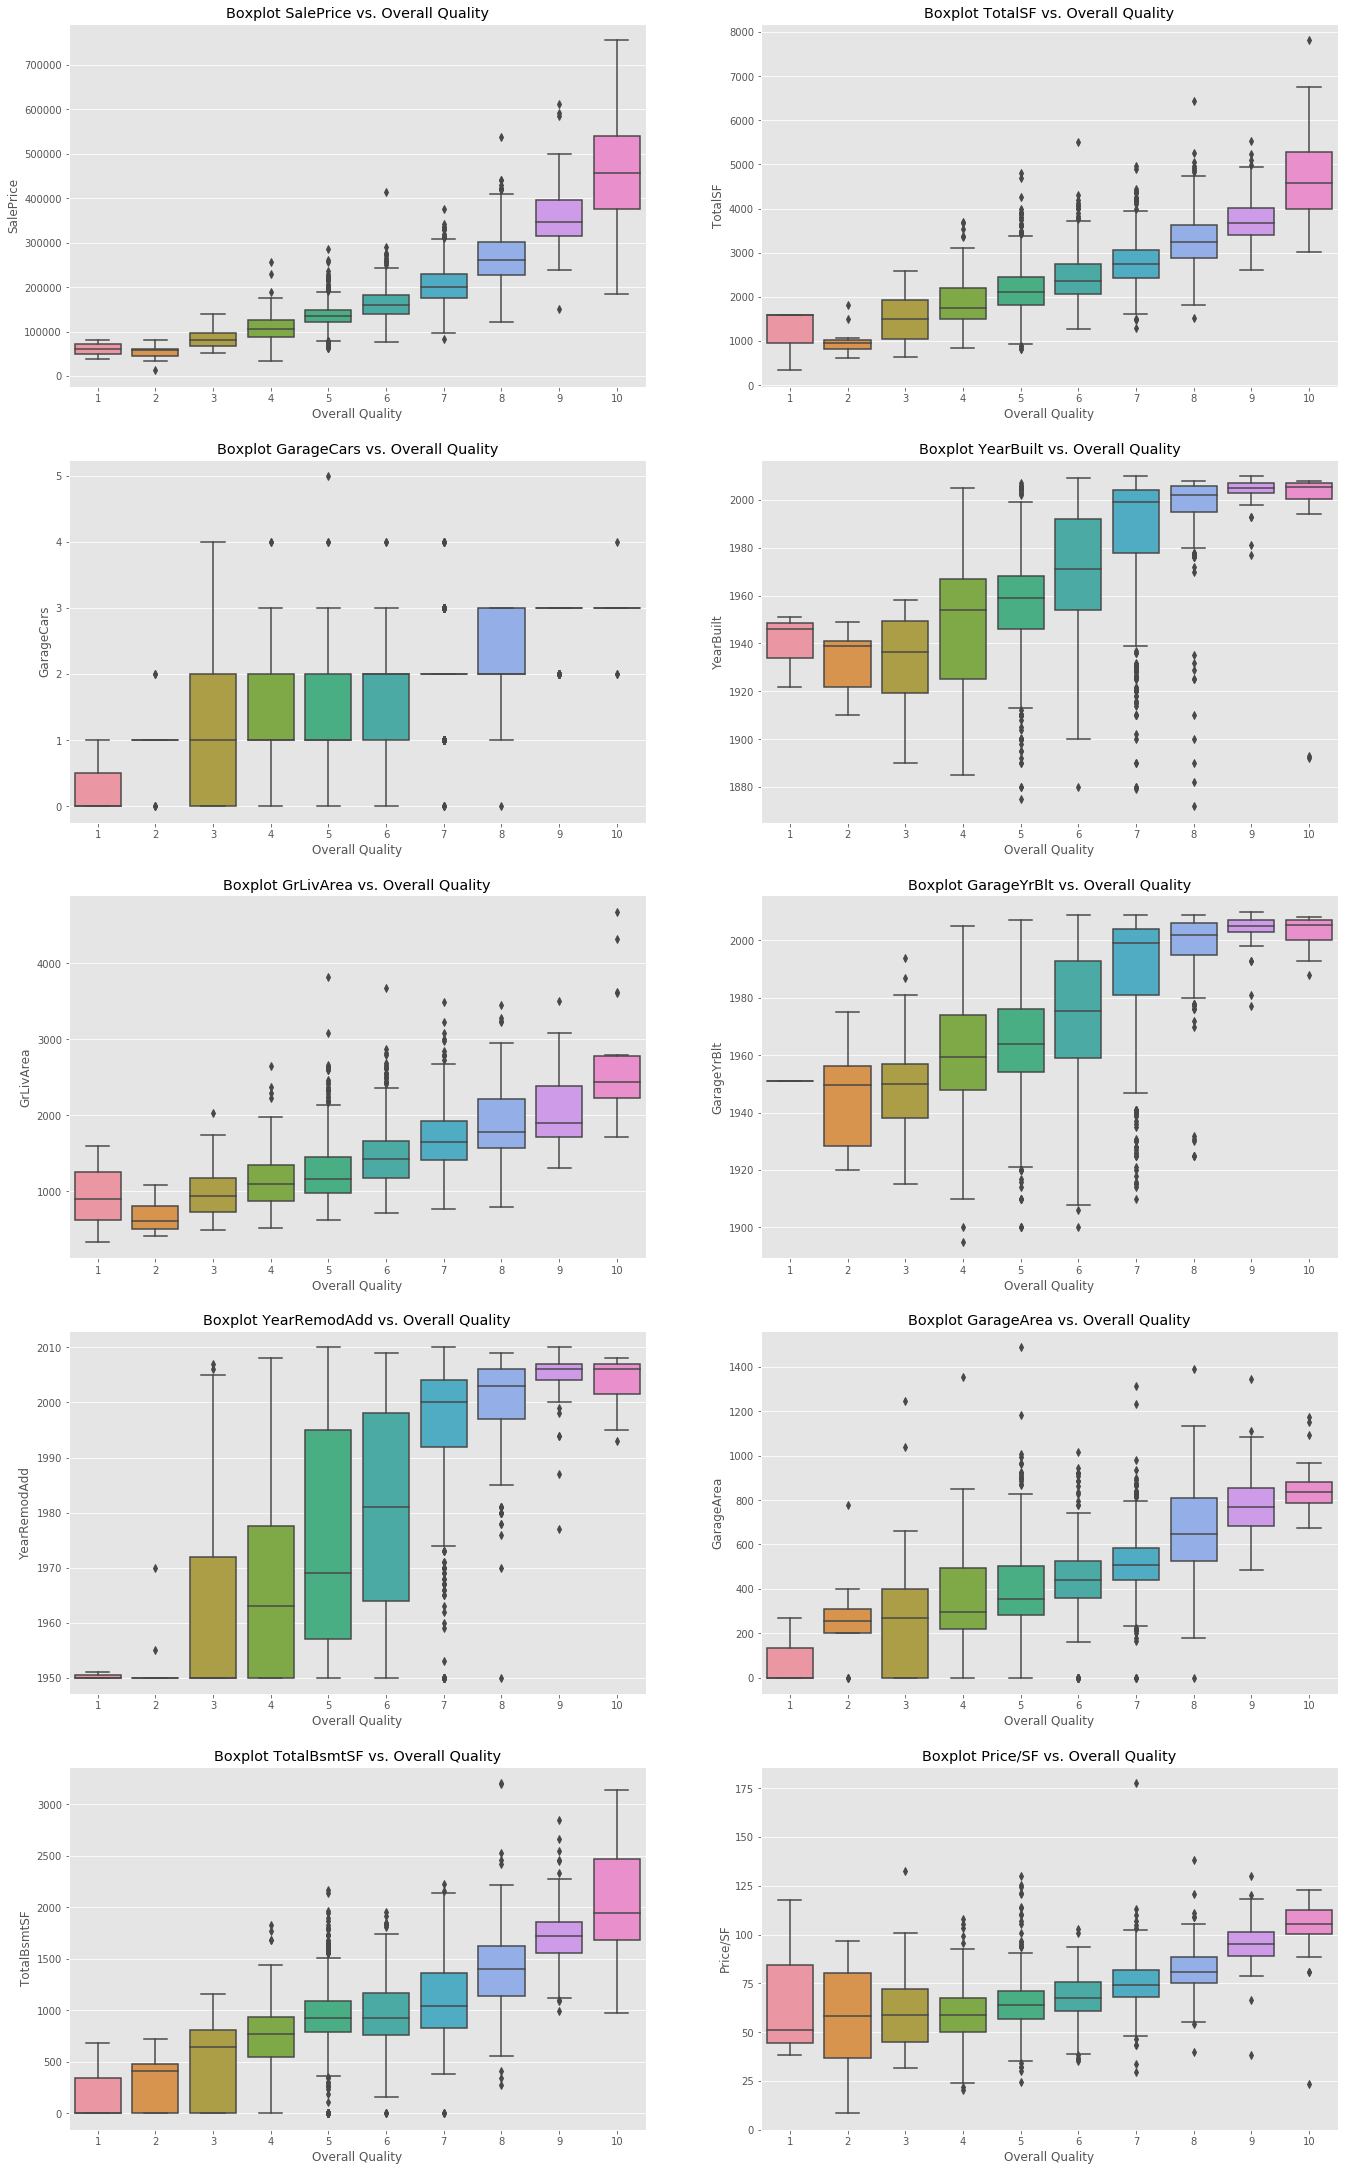

In [28]:
fig, axs = plt.subplots(int(np.ceil(len(qual_cors.index[1:10])/2)),2,figsize = (15,6))
plt.subplots_adjust(right=1.3, top=5)
axs = axs.flatten()
for i, col in enumerate(qual_cors.index[1:11]):
    sns.boxplot(x='OverallQual',y = col,ax=axs[i],data=housing)
    axs[i].set_ylabel(f'{col}')
    axs[i].set_xlabel(f'Overall Quality')
    axs[i].set_title(f'Boxplot {col} vs. Overall Quality')
plt.show()

# Linear Model w/ Naive Feature Selection Based on Correlation w/ Sale Price Alone

In [33]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split

### Dealing with Null Values

In [34]:
data = housing[hsale_cors.index.to_numpy()[0:5]] #subsetting data by columns most correlated with SalePrice in Housing dataset

num_nulls = []
for i in range(0,len(data)):
    num_nulls.append([i,sum(data.iloc[i,:].isnull())])

null_counts = pd.DataFrame(num_nulls)

rows_with_a_null = null_counts.loc[null_counts[1] != 0][0].to_numpy()

rows_without_null = np.delete(np.arange(0,2580), rows_with_a_null, axis=None)

data = data.iloc[rows_without_null,0:len(data)]

### Fitting 

2579 2579
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     2252.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:34:15   Log-Likelihood:                -21419.
No. Observations:                1805   AIC:                         4.285e+04
Df Residuals:                    1801   BIC:                         4.287e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.776e+05    811.969    218.67

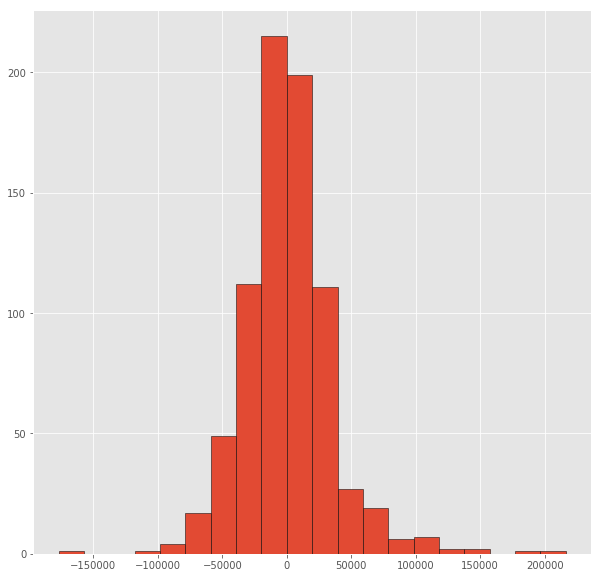

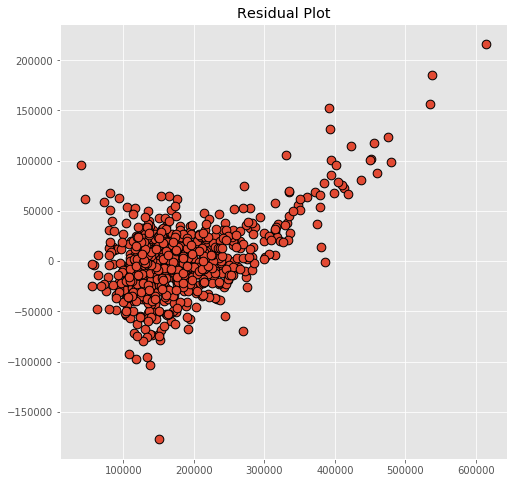

In [35]:
Y = data['SalePrice']
X = data.iloc[:,1:]
X.columns

print(len(X),len(Y))


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)
#################################################################### statsmodels
X_add_const = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_add_const)
results = model.fit()
print(results.summary())

###################################################################### sklearn

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

##################################################################### diagnostic plots

residuals = y_test - lm.predict(X_test_scaled)
residuals.hist(bins = 20,figsize = (10,10),edgecolor = 'black')

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
plt.scatter(x = y_test,y = residuals,edgecolors = 'black',linewidths = 1,s = 75)
plt.title('Residual Plot')
plt.show()

Residual plot is indicating multicollinearity issues.

# Feature Selection with Lasso Regression:

### 1.) SalePrice Target

In [137]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import copy

# *Imputing Nulls*

In [458]:
def get_null_rows(data_df,subset_df,c,val=False):
    
    '''
    get rows of a dataframe in a specific columns that are null or match a stated val
    
    parameters:
    
    data_df = dataframe to query
    subset_df = dataframe which is a subset of data_df whose columns exist in data_df
    c = index of subset_df.columns
    val = boolean to determine if you want to filter by value or by the function .isnull()
    
    '''
    
    if val == False:
        return data_df.loc[data_df[subset_df.columns[c]].isnull()][[subset_df.columns[c]]]
    else:
        return data_df.loc[data_df[subset_df.columns[c]] == val][[subset_df.columns[c]]]

In [459]:
data = hres.copy()
data.shape

(2603, 118)

In [460]:
nan_counts = pd.DataFrame(data.isnull().sum()).T
#nan_counts

### **By default we'll drop features that have 1k+ null values**

Alley, FireplaceQu, PoolQC, Fence, MiscFeature, SaleCond, PA-PostD, PA-PreD, PA-UntNo

In [461]:
high_null_cols = ["Alley", "FireplaceQu", "PoolQC",
                  "Fence", "MiscFeature", "SaleCond",
                  "PA-PostD", "PA-PreD", "PA-UntNo","PA-UnTyp"] #columns with too many nulls

data = data.drop(high_null_cols,axis = 1)

nan_counts = pd.DataFrame(data.isnull().sum()).T
#nan_counts

nan_counts = nan_counts.iloc[:,[i for i,j in enumerate(nan_counts.loc[0].to_list()) if j != 0]]

Lot frontage also can't be imputed, so we'll drop that too.

In [462]:
data = data.drop('LotFrontage', axis = 1)

### Resulting Columns that Could have Null Values and their Null Counts

In [463]:
nan_counts

LotFrontage  MasVnrType  MasVnrArea  BsmtQual  BsmtCond  BsmtExposure  \
0          462          14          14        65        65            67   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            65           1            66           1          1            1   

   Electrical  BsmtFullBath  BsmtHalfBath  GarageType  GarageYrBlt  \
0           1             2             2         128          130   

   GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  TotalSF  \
0           130           1           1         130         130        1   

   Price/SF  BsmtPercentUnfinished  LowQualFinishedPercent  Ext1  TtlBsmtSF  \
0         1                     65                       1     2          2   

   GarYrBlt  NmbrBRs  Cars  YrBuilt  Central Air  Ext2  GLA  PA-StSfx  
0         2        2     2        2            2     2    2        11

#### **Isolating Garage Variables**

In [464]:
garage = data[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

gr_nulls = garage.loc[garage.isna().any(axis=1)] # specific rows that have nulls in at least one column

#gr_nulls

In [465]:
len(gr_nulls)

130

### Unique Values in Each Column

In [466]:
for i in range(0,len(gr_nulls.columns)):
    print(gr_nulls.columns[i],':','\n',set(gr_nulls[gr_nulls.columns[i]]),'\n')

GarageType : 
 {nan, 'Detchd'} 

GarageYrBlt : 
 {nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan} 

GarageFinish : 
 {nan} 

GarageCars : 
 {0.0, nan, 1.0} 

GarageArea : 
 {0.0, nan, 360.0} 

GarageQual : 
 {nan} 

GarageCond : 
 {nan} 



In [467]:
for i in range(0,len(gr_nulls.columns)):
    print(gr_nulls.columns[i],
          ':',
          '\n',len(gr_nulls),
          '\n',gr_nulls[gr_nulls.columns[i]].value_counts(),
          '\n\n\n')

GarageType : 
 130 
 Detchd    2
Name: GarageType, dtype: int64 



GarageYrBlt : 
 130 
 Series([], Name: GarageYrBlt, dtype: int64) 



GarageFinish : 
 130 
 Series([], Name: GarageFinish, dtype: int64) 



GarageCars : 
 130 
 0.0    128
1.0      1
Name: GarageCars, dtype: int64 



GarageArea : 
 130 
 0.0      128
360.0      1
Name: GarageArea, dtype: int64 



GarageQual : 
 130 
 Series([], Name: GarageQual, dtype: int64) 



GarageCond : 
 130 
 Series([], Name: GarageCond, dtype: int64) 





In [468]:
gr_nulls[['GarageType','GarageYrBlt']].loc[~gr_nulls['GarageType'].isna() & gr_nulls['GarageYrBlt'].isnull()]

GarageType  GarageYrBlt
437     Detchd          NaN
534     Detchd          NaN

 ####  Two homes have recorded garage types but unrecorded year built, so we can't simply fill them with zero to signify no garage. We elect to drop all rows where the existence of the garage is inconclusive.

#### Isolating Basement Variables

In [469]:
basement = data[['BsmtQual',"BsmtCond","BsmtExposure",
                 'BsmtFinType1',"BsmtFinSF1","BsmtFinType2",
                 "BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtPercentUnfinished"]]
bm_nulls = basement.loc[basement.isna().any(axis=1)]
#bm_nulls.loc[bm_nulls.isna().any(axis = 1)]

len(bm_nulls)

### Unique Values in Each Column

In [471]:
for i in range(0,len(bm_nulls.columns)):
    print(bm_nulls.columns[i],':','\n',set(bm_nulls[bm_nulls.columns[i]]),'\n')

BsmtQual : 
 {nan, 'Gd'} 

BsmtCond : 
 {nan, 'TA'} 

BsmtExposure : 
 {nan, 'No'} 

BsmtFinType1 : 
 {nan, 'GLQ', 'Unf'} 

BsmtFinSF1 : 
 {0.0, nan, 1124.0} 

BsmtFinType2 : 
 {nan, 'Unf'} 

BsmtFinSF2 : 
 {0.0, nan, 479.0} 

BsmtUnfSF : 
 {0.0, nan, 1603.0, 936.0, 1595.0} 

TotalBsmtSF : 
 {0.0, nan, 3206.0, 936.0, 1595.0} 

BsmtPercentUnfinished : 
 {nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.5, nan, nan} 



In [472]:
for i in range(0,len(bm_nulls.columns)):
    print(bm_nulls.columns[i],
          ':',
          '\n',len(bm_nulls),
          '\n',bm_nulls[bm_nulls.columns[i]].value_counts(),
          '\n\n\n')

BsmtQual : 
 68 
 Gd    3
Name: BsmtQual, dtype: int64 



BsmtCond : 
 68 
 TA    3
Name: BsmtCond, dtype: int64 



BsmtExposure : 
 68 
 No    1
Name: BsmtExposure, dtype: int64 



BsmtFinType1 : 
 68 
 Unf    2
GLQ    1
Name: BsmtFinType1, dtype: int64 



BsmtFinSF1 : 
 68 
 0.0       66
1124.0     1
Name: BsmtFinSF1, dtype: int64 



BsmtFinType2 : 
 68 
 Unf    2
Name: BsmtFinType2, dtype: int64 



BsmtFinSF2 : 
 68 
 0.0      66
479.0     1
Name: BsmtFinSF2, dtype: int64 



BsmtUnfSF : 
 68 
 0.0       64
1595.0     1
1603.0     1
936.0      1
Name: BsmtUnfSF, dtype: int64 



TotalBsmtSF : 
 68 
 0.0       64
1595.0     1
3206.0     1
936.0      1
Name: TotalBsmtSF, dtype: int64 



BsmtPercentUnfinished : 
 68 
 1.0    2
0.5    1
Name: BsmtPercentUnfinished, dtype: int64 





### Data isolating basement and garage variables

In [473]:
gr_bm_nulls = data[list(gr_nulls.columns) + list(bm_nulls.columns)]
gr_bm_nulls = gr_bm_nulls.loc[gr_bm_nulls.isnull().any(axis = 1)]
len(gr_bm_nulls)

187

In [474]:
gr_bm_nulls.index

Int64Index([   6,   18,   23,   49,   53,   55,   59,   65,   97,  100,
            ...
            2471, 2478, 2488, 2489, 2505, 2512, 2538, 2563, 2569, 2599],
           dtype='int64', length=187)

For rows in the data where either of the selected basement or garage variables are null, they amount to only 187 rows.

For simplicity, we'll just drop them. 

In [475]:
data.shape

(2603, 107)

In [476]:
data = data.drop(gr_bm_nulls.index,axis = 0)
data.shape

(2416, 107)

In [477]:
data.loc[data.isnull().any(axis = 1)]

MapRefNo  GrLivArea  SalePrice  MSSubClass MSZoning  LotArea Street  \
19    534152050       1610     205000          20       RL    10603   Pave   
178   528439010       1460     247000          20       RL    10037   Pave   
362   528462040       1428     182000          20       FV    11639   Pave   
434   534152120       1334     167900          20       RL     9650   Pave   
467   534151180       2075     255000          60       RL    10530   Pave   
661   534151175       2495     243500          60       RL    10791   Pave   
757   533208040       1241     199900         120       FV     4274   Pave   
791   528240070       1960     216500          60       RL     7851   Pave   
877   907260030       1725     198500          60       RL     8749   Pave   
897   528290090       1414     176000          60       RL     7750   Pave   
957   528429100       1670     336820          20       RL    15218   Pave   
1047  531371050       1200     184900          20       RL    10083   Pave   
1172  534104100       1812     205000          60       FV     7500   Pave   
1299  534151120       2288     230000          60       RL    13774   Pave   
1343  905427070       2108     235000          70       RL    13728   Pave   
1368  528480160       1665     205950          60       FV     8125   Pave   
1567  907251090       2031     237000          60       RL     9473   Pave   
1586  911104060        572      75000          30  C (all)    10200   Pave   
1852  534152100       1714     196500          60       RL    10421   Pave   
2241  534152070       1891     212500          50       RL    18837   Pave   
2295  534151090       1594     188500          20       RL     9547   Pave   
2465  916386080       1394     167500          80       RL     9735   Pave   
2501  528250010       1394     165500          80       RL    11950   Pave   
2559  528275160       2004     257500          60       RL    12891   Pave   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
19        IR1         Lvl    AllPub    Inside       Gtl       NWAmes   
178       Reg         Lvl    AllPub    Corner       Gtl      Somerst   
362       Reg         Lvl    AllPub    Corner       Gtl      Somerst   
434       Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
467       Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
661       Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
757       IR1         Lvl    AllPub    Inside       Gtl      Somerst   
791       Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
877       Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
897       Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
957       IR1         Lvl    AllPub   CulDSac       Gtl      Somerst   
1047      Reg         Lvl    AllPub    Inside       Gtl      SawyerW   
1172      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
1299      IR1         Lvl    AllPub    Inside       Gtl       NWAmes   
1343      Reg         Lvl    AllPub    Corner       Gtl      Edwards   
1368      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
1567      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1586      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   
1852      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
2241      IR1         Lvl    AllPub    Inside       Gtl       NWAmes   
2295      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
2465      Reg         Lvl    AllPub    Inside       Gtl       Timber   
2501      IR1         Lvl    AllPub    Corner       Gtl      Gilbert   
2559      IR1         Lvl    AllPub    Corner       Gtl      Gilbert   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
19         Norm       Norm     1Fam     1Story            6            7   
178       Feedr       Norm     1Fam     1Story            8            5   
362        Norm       Norm 

### What columns can still take on nulls?

In [482]:
nan_counts = pd.DataFrame(data.isnull().sum()).T
nan_counts = nan_counts.iloc[:,[i for i,j in enumerate(nan_counts.loc[0].to_list()) if j != 0]]

oth_nulls = data[nan_counts.columns]
oth_nulls = oth_nulls.loc[oth_nulls.isnull().any(axis = 1)]
oth_nulls.index

In [496]:
data = data.drop(oth_nulls.index,axis = 0)

In [497]:
data.shape

(2392, 107)

# Truncated data with problematic rows dropped

In [498]:
hres_truncated = data

In [502]:
hres_trunc_corr = pd.DataFrame(hres_truncated.corr())
hres_trunc_corr_nonull = hres_trunc_corr.dropna(axis = 0,how = 'all').dropna(axis = 1,how = 'all')

In [507]:
filtered_Heat(hres_trunc_corr_nonull,0,h=800,w=800,a=1,dir_ = True) #merged dataset heatmap

In [508]:
fig = px.imshow(hres_trunc_corr_nonull[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Sale Price Heatmap Merged Dataset')
fig.show()

fig = px.imshow(hres_trunc_corr_nonull[['Price/SF']].sort_values(by = 'Price/SF', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Price/SF Heatmap Merged Dataset')
fig.show()

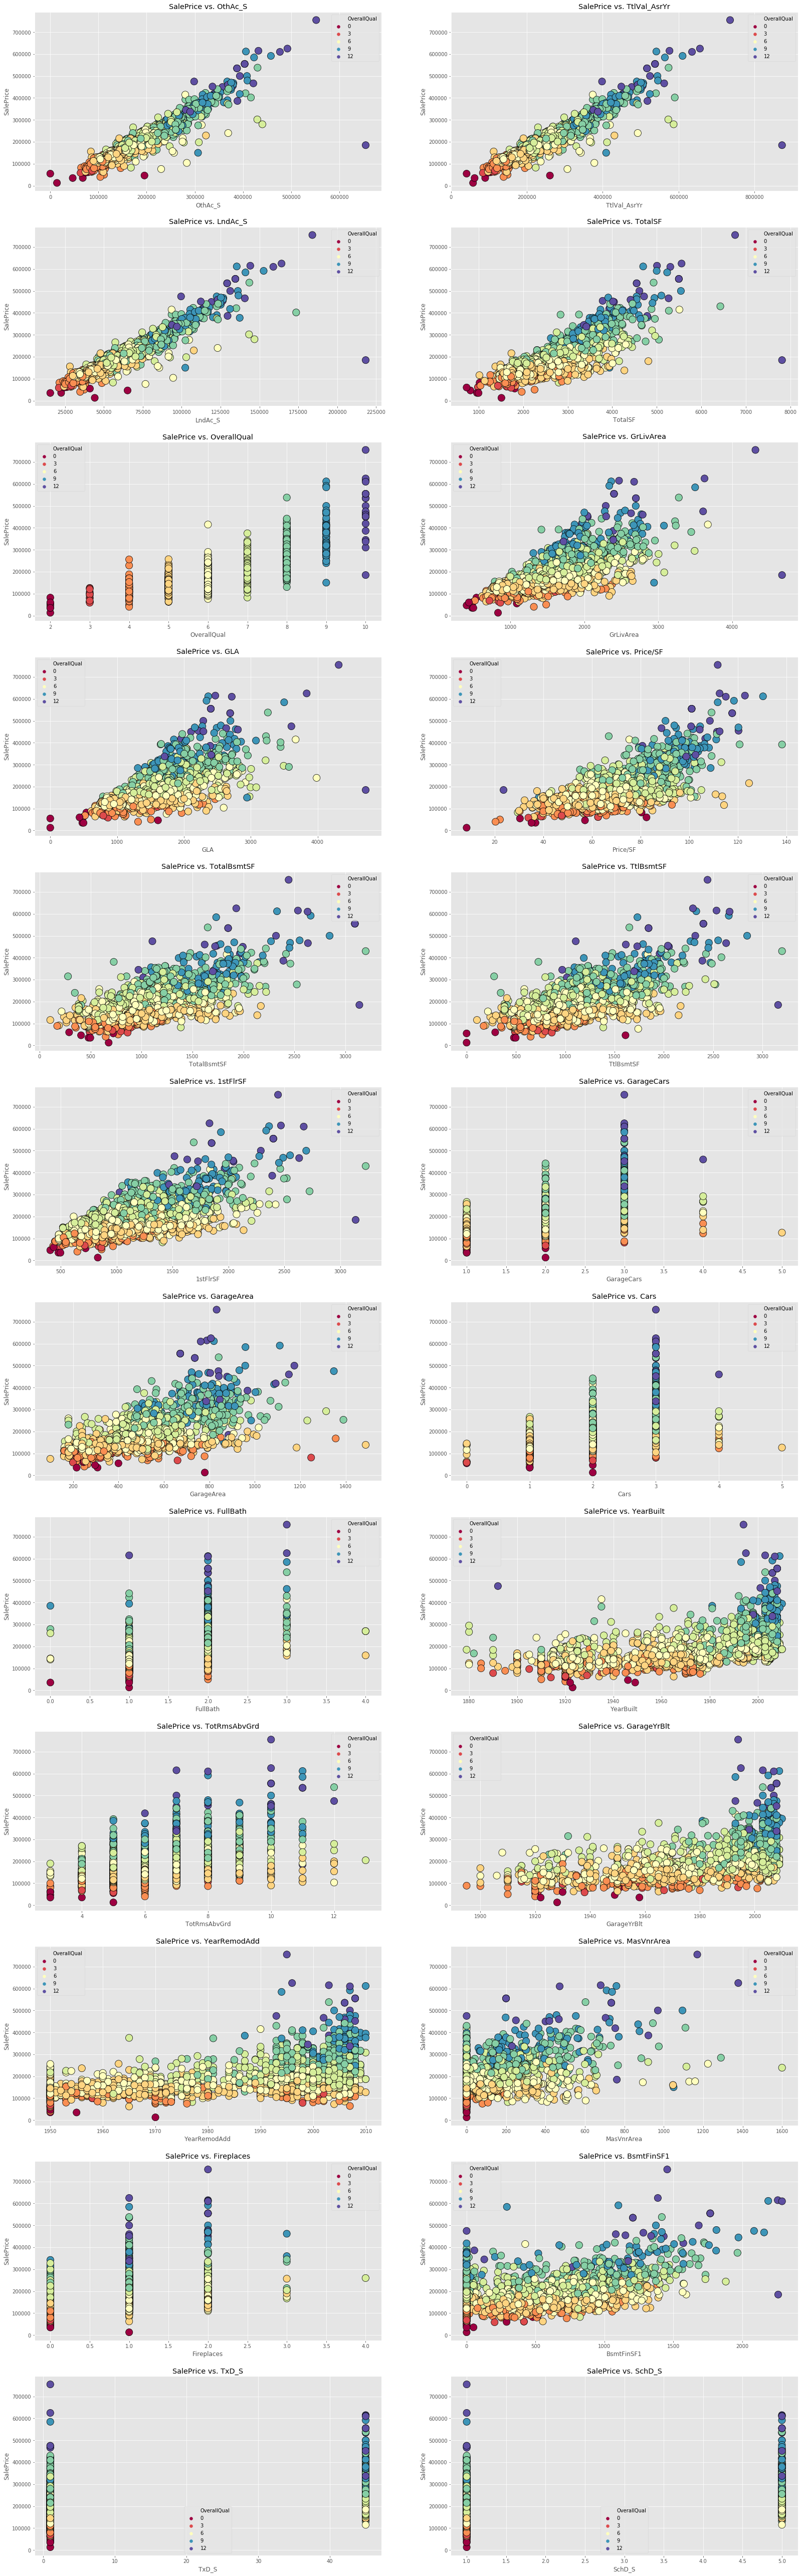

In [509]:
top_cors =  hres_trunc_corr_nonull[['SalePrice']].sort_values(by = 'SalePrice', ascending = False) # sorted correlations with SalePrice from truncated dataset

fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(top_cors.index[1:25])):
    sns.scatterplot(y='SalePrice', x=col, s = 200,ax=axs[i],hue = 'OverallQual',palette="Spectral",edgecolor = 'black',data=hres_truncated)
    axs[i].set_ylabel('SalePrice')
    axs[i].set_xlabel(col)
    axs[i].set_title(f'SalePrice vs. {col}')
plt.show()

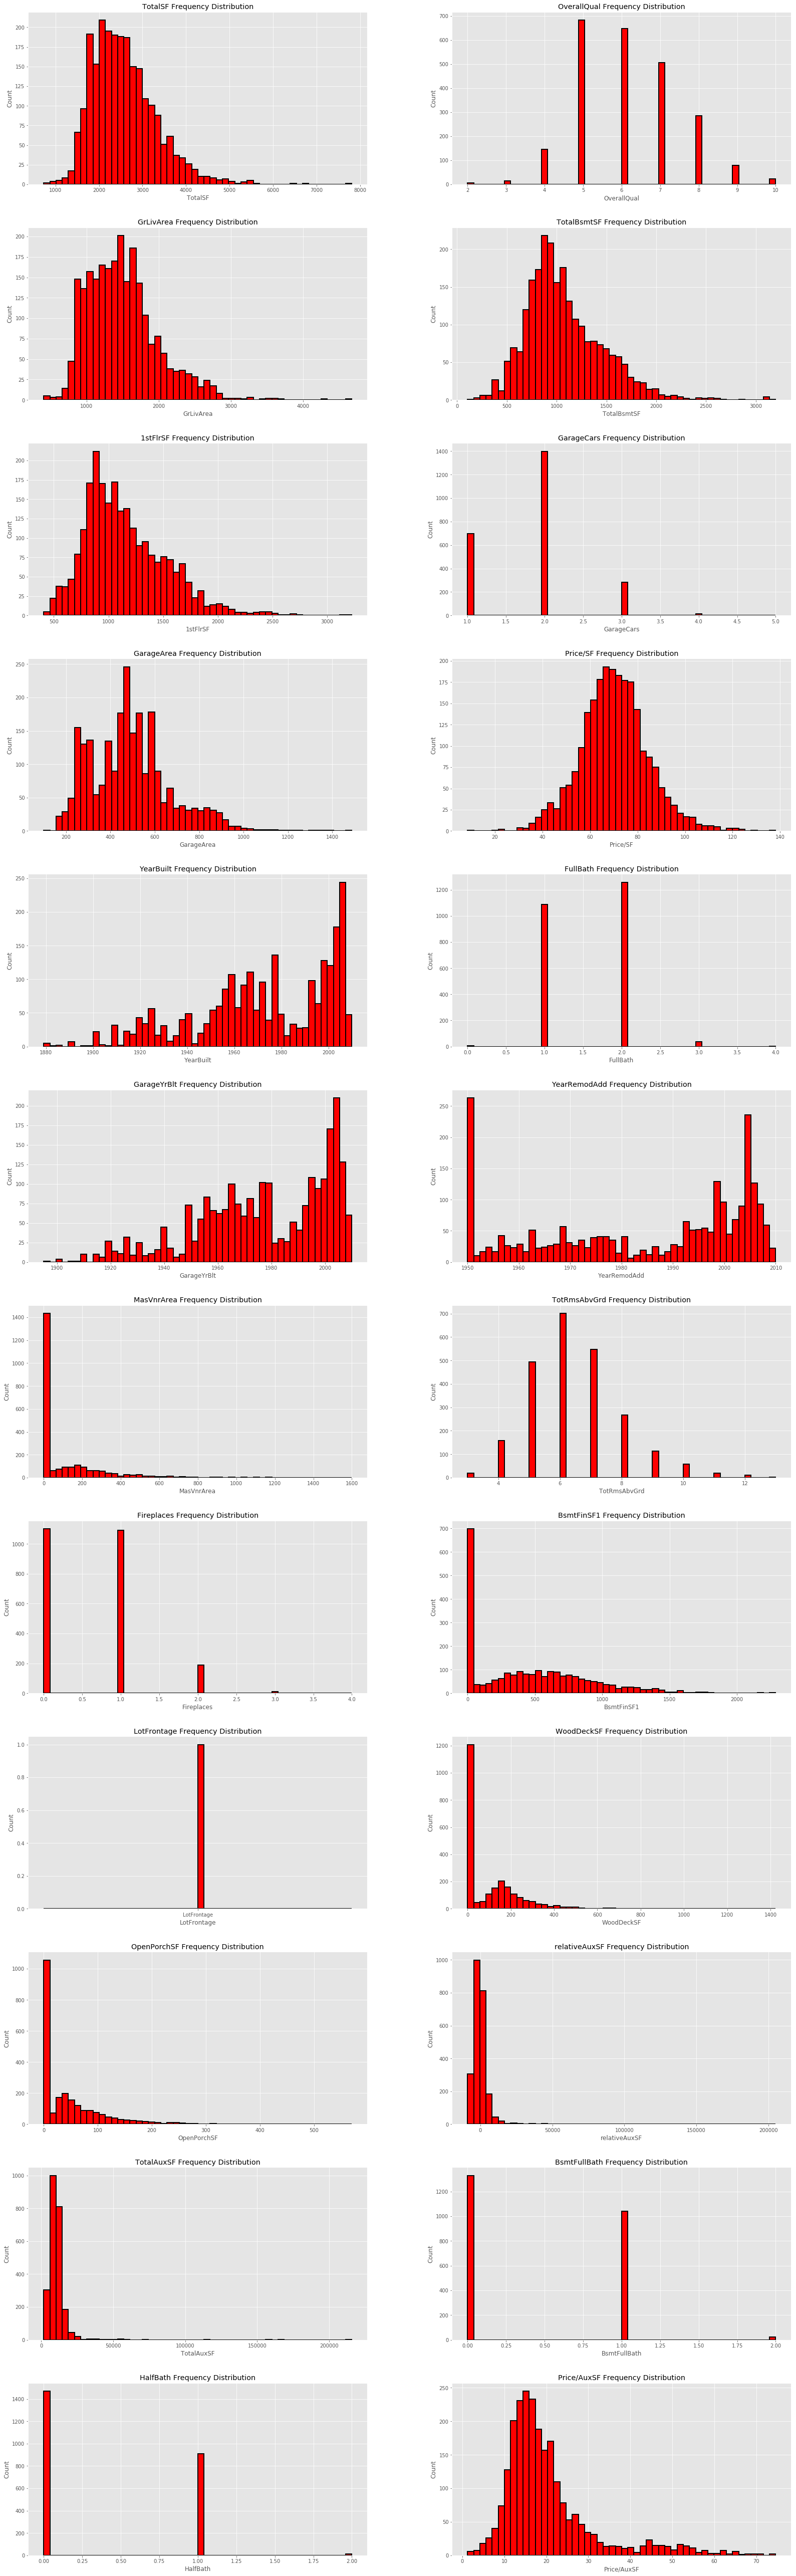

In [510]:
# fig, axs = plt.subplots(12,2, figsize=(18, 60))
# plt.subplots_adjust(right=1.3, top=1.3,wspace = .25,hspace = .25)
# axs = axs.flatten()
# for i, col in enumerate(list(hsale_cors.index[1:25])):
#     axs[i].hist(x=col,data=hres_truncated,edgecolor = 'black',color = 'red',linewidth = 2, bins = 50)
#     axs[i].set_ylabel('Count')
#     axs[i].set_xlabel(col)
#     axs[i].set_title(f'{col} Frequency Distribution')

In [136]:
# lasso = Lasso()

# alpha_range = np.linspace(0.1,20.1,20)
# lasso.set_params(normalize=False)
# coefs_lasso  = []

# for alpha in alpha_range:
#         lasso.set_params(alpha=alpha)
#         lasso.fit(, )  
#         coefs_lasso.append(lasso.coef_)

# coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas_range, columns = .columns)  
# coefs_lasso.head()

In [ ]:
# for name in coefs_lasso.columns:
#     plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')
# plt.legend(loc=1) 